<a href="https://colab.research.google.com/github/nikhomgithub/tfSciPy2018/blob/master/sentdex_cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)



2.0.0-dev20190916


In [0]:
mnist=keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
train_labels.shape

(60000,)

In [20]:
test_images.shape

(10000, 28, 28)

In [21]:
len(test_labels)

10000

In [22]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
img_size=28

cvt_train_images=train_images/255.0
cvt_test_images=test_images/255.0

cvt_train_images=np.array(train_images).reshape(-1,img_size,img_size,1)
cvt_test_images=np.array(test_images).reshape(-1,img_size,img_size,1)

In [24]:
print(cvt_train_images.shape)

(60000, 28, 28, 1)


In [25]:
print(cvt_test_images.shape)

(10000, 28, 28, 1)


In [26]:
print(cvt_test_images.dtype)

uint8


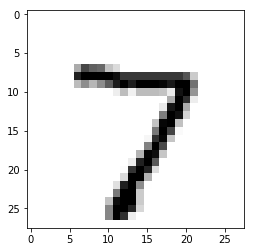

In [27]:
plt.imshow(test_images[0],cmap=plt.cm.binary)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


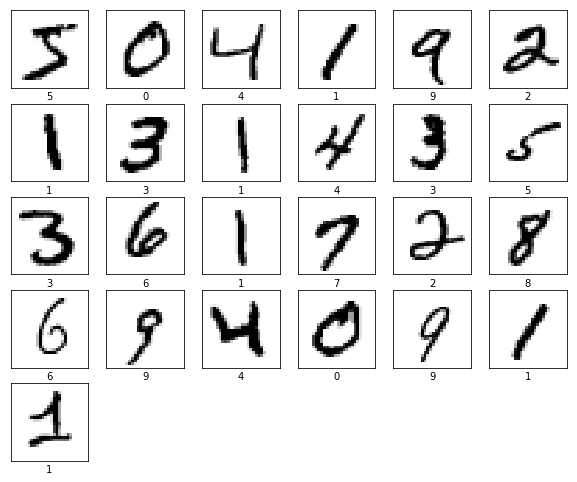

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])

In [0]:
"""
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
"""

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [29]:
model = keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    keras.layers.Conv2D(12, (3,3), activation=tf.nn.relu, input_shape=(28, 28,1)),
    keras.layers.MaxPooling2D(2, 2),
    
    # This is the second convolution
    keras.layers.Conv2D(12, (3,3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(2, 2),
    
    # Flatten the results to feed into a DNN
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 12)        120       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 12)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 12)        1308      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 300)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [30]:
history=model.fit(cvt_train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 28s 471us/sample - loss: 1.0119 - accuracy: 0.7840
Epoch 2/5
60000/60000 [==============================] - 28s 462us/sample - loss: 0.2499 - accuracy: 0.9220
Epoch 3/5
60000/60000 [==============================] - 28s 471us/sample - loss: 0.1883 - accuracy: 0.9412
Epoch 4/5
60000/60000 [==============================] - 28s 467us/sample - loss: 0.1538 - accuracy: 0.9526
Epoch 5/5
60000/60000 [==============================] - 28s 473us/sample - loss: 0.1383 - accuracy: 0.9578


In [31]:
test_loss, test_acc = model.evaluate(cvt_test_images, test_labels)

print('Test accuracy:', test_acc)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
cvt_test_images=cvt_test_images*1.0

In [45]:
print(cvt_test_images.dtype)

float64


In [0]:
predictions = model.predict(cvt_test_images)


Text(0.5, 0, '2')

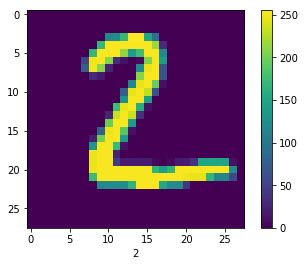

In [47]:
i=1
predictions[i]
plt.figure()
plt.imshow(test_images[i])
plt.colorbar()
plt.gca().grid(False)
plt.xlabel(test_labels[i])

In [48]:
model.save('mnist_model.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_model.model/assets


In [0]:
new_model=tf.keras.models.load_model('mnist_model.model')

In [0]:
new_prediction=new_model.predict(cvt_test_images)

In [51]:
new_prediction.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
from google.colab import files
files.download('mnist_model.model') 

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving mnist_model.model to mnist_model (1).model
User uploaded file "mnist_model.model" with length 1657088 bytes


In [57]:
model2 = keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    keras.layers.Conv2D(12, (3,3), activation=tf.nn.relu, input_shape=(28, 28,1)),
    keras.layers.MaxPooling2D(2, 2),
    
    # This is the second convolution
    keras.layers.Conv2D(12, (3,3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(2, 2),
    
    # Flatten the results to feed into a DNN
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2.summary()

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 12)        120       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 12)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 12)        1308      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 12)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 300)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)              

In [61]:
history2=model2.fit(cvt_train_images,train_labels,batch_size=32, epochs=10, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 23s 551us/sample - loss: 0.1458 - accuracy: 0.9553 - val_loss: 0.0687 - val_accuracy: 0.9794
Epoch 2/10
42000/42000 [==============================] - 23s 548us/sample - loss: 0.1264 - accuracy: 0.9597 - val_loss: 0.0638 - val_accuracy: 0.9800
Epoch 3/10
42000/42000 [==============================] - 23s 547us/sample - loss: 0.1218 - accuracy: 0.9626 - val_loss: 0.0696 - val_accuracy: 0.9799
Epoch 4/10
42000/42000 [==============================] - 23s 545us/sample - loss: 0.1114 - accuracy: 0.9655 - val_loss: 0.0575 - val_accuracy: 0.9833
Epoch 5/10
42000/42000 [==============================] - 23s 543us/sample - loss: 0.1154 - accuracy: 0.9645 - val_loss: 0.0545 - val_accuracy: 0.9842
Epoch 6/10
42000/42000 [==============================] - 23s 537us/sample - loss: 0.1046 - accuracy: 0.9676 - val_loss: 0.0578 - val_accuracy: 0.9825
Epoch 7/10
42000/42000 [====================

In [62]:
history_dict = history2.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

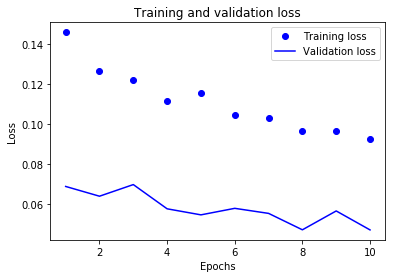

In [63]:
acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(1,len(acc)+1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


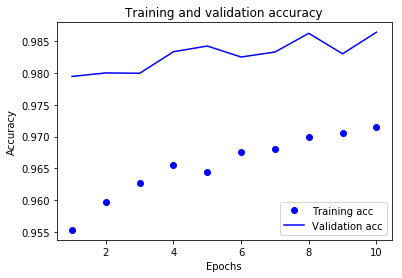

In [64]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [0]:
prediction2=model2.predict([cvt_test_images])

In [66]:
print(prediction2.shape)

(10000, 10)


In [67]:
print(cvt_test_images.shape)

(10000, 28, 28, 1)


In [68]:
print(len(test_labels))

10000


In [0]:
result=prediction2.argmax(axis=1)

4


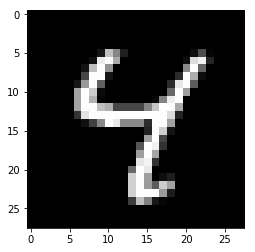

In [70]:
i=6
print(result[i])

plt.imshow(test_images[i],cmap="gray")
plt.show()